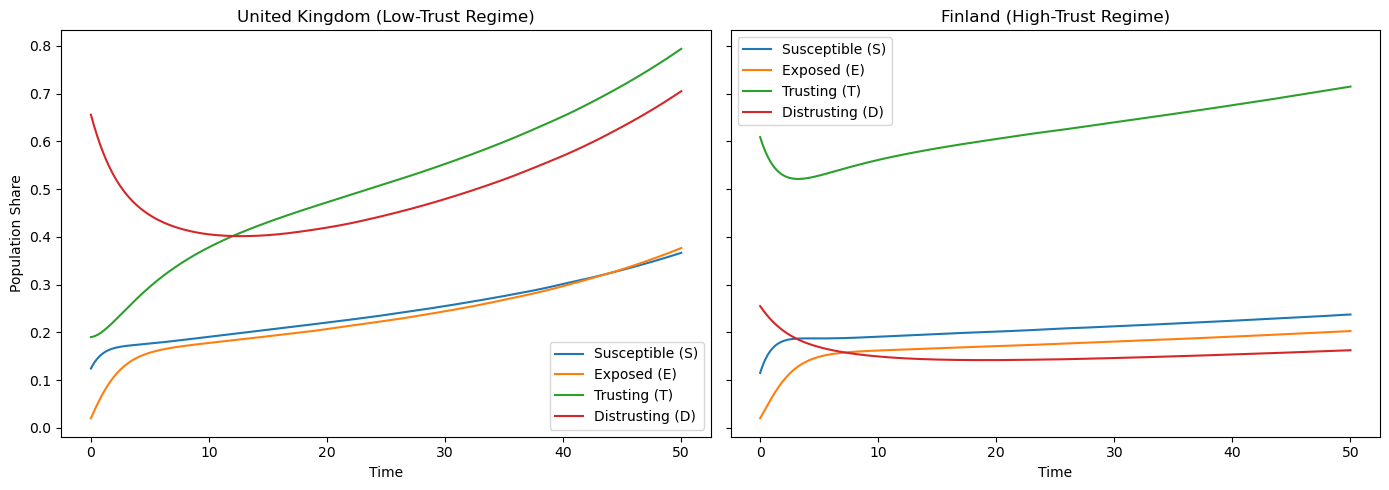

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model definition
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]



# Parameters (fixed)
beta = 0.4     # exposure rate
sigma = 0.5    # processing rate
alpha = 0.3    # institutional reinforcement
delta = 0.2    # trust decay
mu = 0.15      # recovery from distrust
psi = 0.2      # echo chamber strength

# Country-specific theta
theta_uk = 0.65
theta_fin = 0.25


# Initial conditions from OECD 2023
epsilon = 0.02  # small exposed population

# United Kingdom
S0_uk = 0.1441 - epsilon
E0_uk = epsilon
T0_uk = 0.1901
D0_uk = 0.6560
y0_uk = [S0_uk, E0_uk, T0_uk, D0_uk]

# Finland
S0_fin = 0.1349 - epsilon
E0_fin = epsilon
T0_fin = 0.6091
D0_fin = 0.2549
y0_fin = [S0_fin, E0_fin, T0_fin, D0_fin]

# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)


# Solve IVPs using Runge–Kutta
sol_uk = solve_ivp(
    trust_model, t_span, y0_uk,
    args=(beta, sigma, alpha, delta, mu, psi, theta_uk),
    t_eval=t_eval, method="RK45"
)

sol_fin = solve_ivp(
    trust_model, t_span, y0_fin,
    args=(beta, sigma, alpha, delta, mu, psi, theta_fin),
    t_eval=t_eval, method="RK45"
)

# -----------------------------
# Plot results
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

labels = ["Susceptible (S)", "Exposed (E)", "Trusting (T)", "Distrusting (D)"]

# UK plot
for i in range(4):
    axes[0].plot(sol_uk.t, sol_uk.y[i], label=labels[i])
axes[0].set_title("United Kingdom (Low-Trust Regime)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Population Share")
axes[0].legend()

# Finland plot
for i in range(4):
    axes[1].plot(sol_fin.t, sol_fin.y[i], label=labels[i])
axes[1].set_title("Finland (High-Trust Regime)")
axes[1].set_xlabel("Time")
axes[1].legend()

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


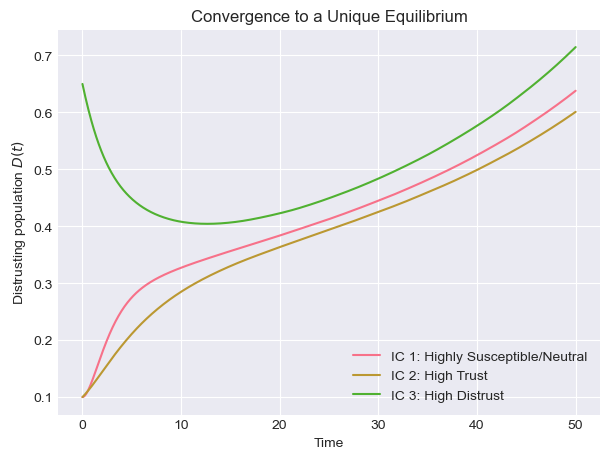

In [ ]:
# -----------------------------
# Convergence to equilibrium (clear version)
# -----------------------------

# S E T D 
initial_conditions = [
    ([0.7, 0.05, 0.15, 0.10], "IC 1: Highly Susceptible/Neutral"), #neutral-heavy society
    ([0.2, 0.10, 0.60, 0.10], "IC 2: High Trust"), #trust-heavy society
    ([0.1, 0.05, 0.20, 0.65], "IC 3: High Distrust") ##trust-heavy society

]

#To test robustness of convergence, we simulate the model from three qualitatively 
# distinct initial conditions: a neutral-dominated population, a trust-dominated population, and a distrust-dominated population.

plt.figure(figsize=(7,5))

final_values = []

for y0, label in initial_conditions:
    sol = solve_ivp(
        trust_model, t_span, y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta_uk),
        t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[3], label=label)

plt.legend()


# Plot equilibrium as horizontal line
D_star = np.mean(final_values)
plt.axhline(D_star, linestyle="--", linewidth=2, label="Equilibrium $D^*$")

plt.xlabel("Time")
plt.ylabel("Distrusting population $D(t)$")
plt.title("Convergence to a Unique Equilibrium")
plt.grid(True)
plt.show()


#Interpretation.
"""Despite markedly different initial conditions—neutral-dominated, trust-dominated, 
and distrust-dominated populations—the trajectories of 
D(t) converge toward the same long-run level. This indicates that, for fixed parameters, 
the system possesses a single attracting equilibrium for distrust that is independent of 
initial belief composition. Initial differences affect only the transient dynamics, not the 
eventual outcome. This numerical result supports the analytical claim that long-run trust and 
distrust levels are governed by structural features of the information environment rather than 
by initial public sentiment.

So the equilibrium represents a steady informational regime of the society:
A stable proportion of the population trusts the media,
A stable proportion distrusts it,
And these proportions persist unless the information environment itself changes

So the equilibrium represents a steady informational regime of the society:
A stable proportion of the population trusts the media,
A stable proportion distrusts it,
And these proportions persist unless the information environment itself changes
"""

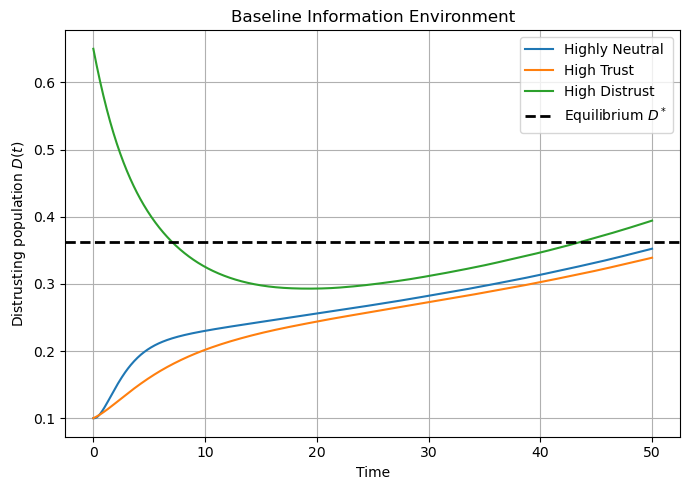

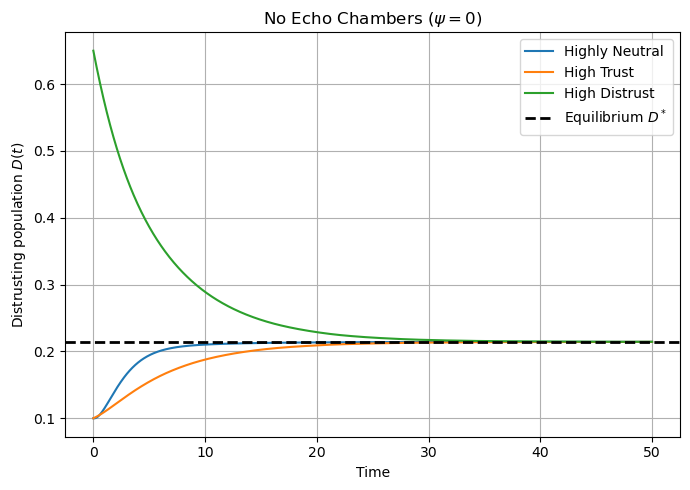

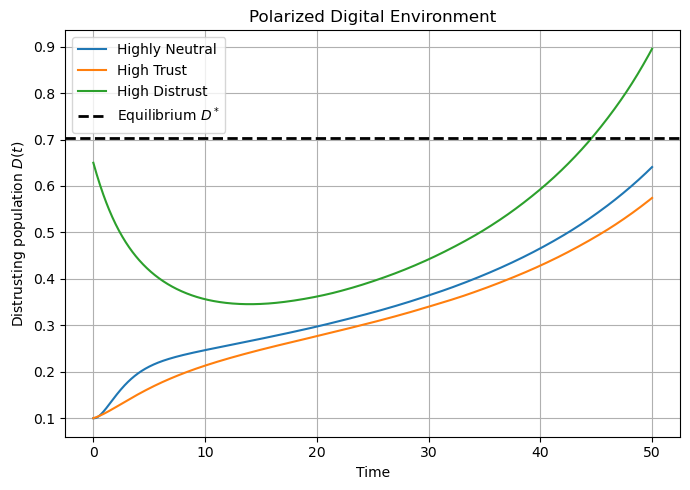

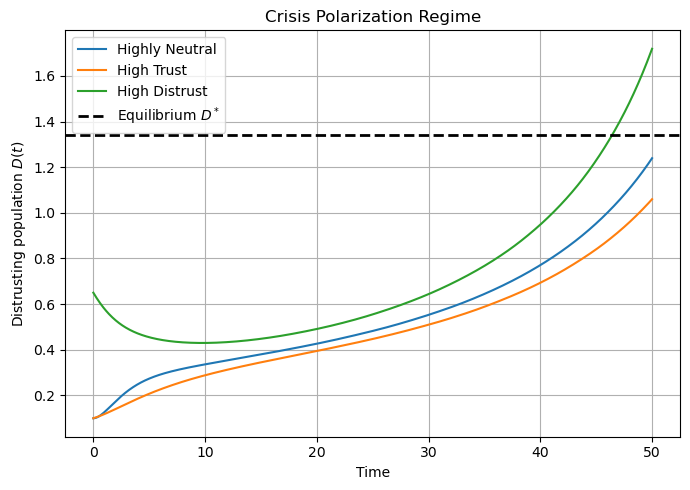

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed baseline parameters
# -----------------------------
beta  = 0.4
sigma = 0.5
delta = 0.2
mu    = 0.15

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# -----------------------------
# Initial conditions
# -----------------------------
initial_conditions = [
    ([0.7, 0.05, 0.15, 0.10], "Highly Neutral"),
    ([0.2, 0.10, 0.60, 0.10], "High Trust"),
    ([0.1, 0.05, 0.20, 0.65], "High Distrust")
]

# -----------------------------
# Parameter regimes (REVISED)
# -----------------------------
parameter_regimes = {
    "Baseline Information Environment": {
        "alpha": 0.30,
        "psi":   0.20,
        "theta": 0.45
    },
    "No Echo Chambers ($\\psi = 0$)": {
        "alpha": 0.30,
        "psi":   0.00,
        "theta": 0.45
    },
    "Polarized Digital Environment": {
        "alpha": 0.30,
        "psi":   0.35,
        "theta": 0.45
    },
    "Crisis Polarization Regime": {
        "alpha": 0.25,
        "psi":   0.30,
        "theta": 0.60
    }
}

# -----------------------------
# Run simulations and plot
# -----------------------------
for title, params in parameter_regimes.items():

    plt.figure(figsize=(7,5))
    final_D = []

    for y0, label in initial_conditions:
        sol = solve_ivp(
            trust_model,
            t_span,
            y0,
            args=(
                beta,
                sigma,
                params["alpha"],
                delta,
                mu,
                params["psi"],
                params["theta"]
            ),
            t_eval=t_eval
        )

        plt.plot(sol.t, sol.y[3], label=label)
        final_D.append(sol.y[3][-1])

    # Plot equilibrium level (numerical steady state)
    D_star = np.mean(final_D)
    plt.axhline(
        D_star,
        linestyle="--",
        linewidth=2,
        color="black",
        label=r"Equilibrium $D^*$"
    )

    plt.xlabel("Time")
    plt.ylabel("Distrusting population $D(t)$")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


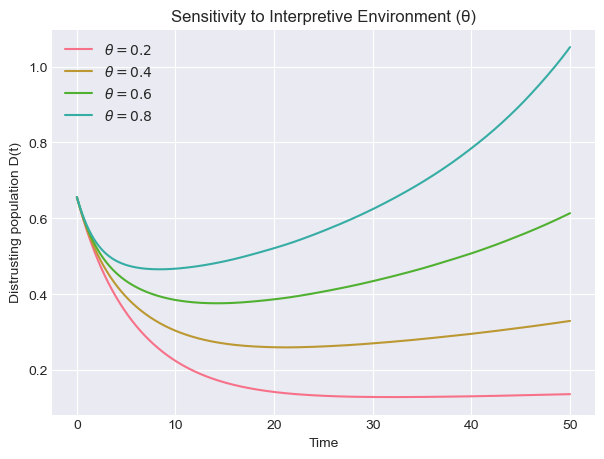

In [ ]:
# -----------------------------
# 2. Sensitivity to theta
# -----------------------------
theta_values = [0.2, 0.4, 0.6, 0.8]

plt.figure(figsize=(7,5))

for theta in theta_values:
    sol = solve_ivp(
        trust_model, t_span, y0_uk,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[3], label=f"$\\theta={theta}$")

plt.xlabel("Time")
plt.ylabel("Distrusting population D(t)")
plt.title("Sensitivity to Interpretive Environment (θ)")
plt.legend()
plt.grid(True)
plt.show()


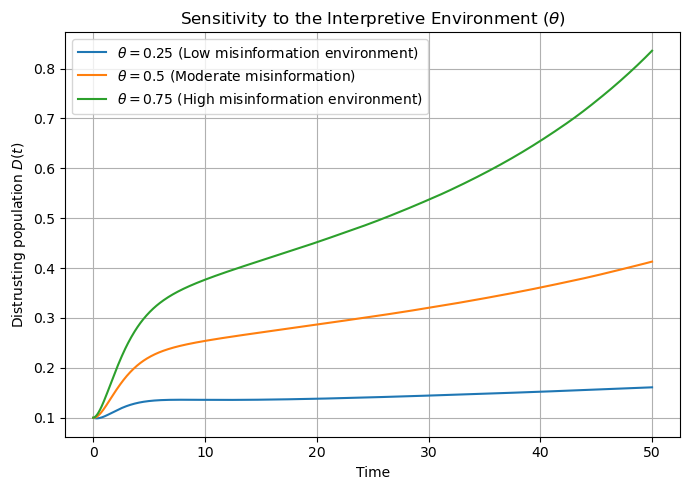

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed parameters
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.2
mu = 0.15
psi = 0.2

# -----------------------------
# Interpretive environments (theta values)
# -----------------------------
theta_values = [
    (0.25, "Low misinformation environment"),
    (0.50, "Moderate misinformation"),
    (0.75, "High misinformation environment")
]

# -----------------------------
# Initial condition (neutral-heavy)
# -----------------------------
y0 = [0.7, 0.05, 0.15, 0.10]

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(7,5))

for theta, label in theta_values:
    sol = solve_ivp(
        trust_model,
        t_span,
        y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[3], label=rf"$\theta={theta}$ ({label})")

plt.xlabel("Time")
plt.ylabel("Distrusting population $D(t)$")
plt.title("Sensitivity to the Interpretive Environment ($\\theta$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


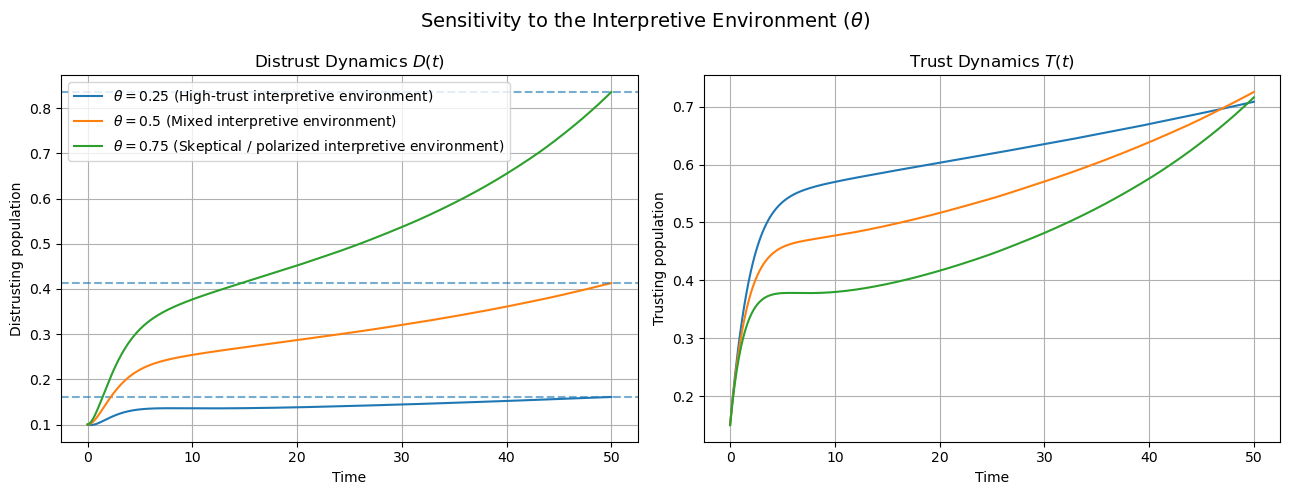

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed parameters
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.2
mu = 0.15
psi = 0.2

# -----------------------------
# Interpretive environments (theta)
# -----------------------------
theta_values = [
    (0.25, "High-trust interpretive environment"),
    (0.50, "Mixed interpretive environment"),
    (0.75, "Skeptical / polarized interpretive environment")
]

# -----------------------------
# Initial condition (neutral-heavy)
# -----------------------------
y0 = [0.7, 0.05, 0.15, 0.10]

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharex=True)

for theta, label in theta_values:
    sol = solve_ivp(
        trust_model,
        t_span,
        y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )

    # Distrust dynamics
    axes[0].plot(sol.t, sol.y[3], label=rf"$\theta={theta}$ ({label})")
    axes[0].axhline(sol.y[3][-1], linestyle="--", alpha=0.6)

    # Trust dynamics
    axes[1].plot(sol.t, sol.y[2], label=rf"$\theta={theta}$")

# -----------------------------
# Formatting
# -----------------------------
axes[0].set_title("Distrust Dynamics $D(t)$")
axes[0].set_ylabel("Distrusting population")
axes[0].grid(True)

axes[1].set_title("Trust Dynamics $T(t)$")
axes[1].set_ylabel("Trusting population")
axes[1].grid(True)

for ax in axes:
    ax.set_xlabel("Time")

axes[0].legend()
plt.suptitle("Sensitivity to the Interpretive Environment ($\\theta$)", fontsize=14)
plt.tight_layout()
plt.show()


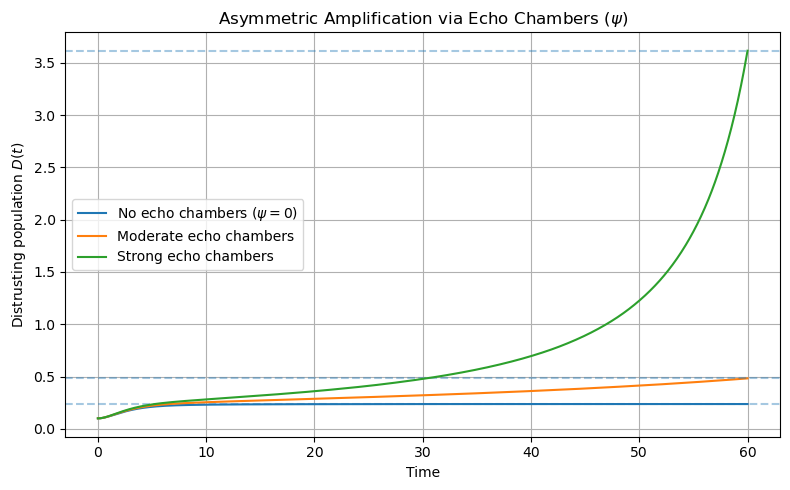

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed parameters (baseline democracy)
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.2
mu = 0.15
theta = 0.5        # fixed interpretive environment

# -----------------------------
# Echo chamber scenarios (psi)
# -----------------------------
psi_values = [
    (0.0, "No echo chambers ($\\psi=0$)"),
    (0.2, "Moderate echo chambers"),
    (0.4, "Strong echo chambers")
]

# -----------------------------
# Initial condition (neutral-heavy)
# -----------------------------
y0 = [0.7, 0.05, 0.15, 0.10]

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 60)
t_eval = np.linspace(*t_span, 1200)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,5))

for psi, label in psi_values:
    sol = solve_ivp(
        trust_model,
        t_span,
        y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )

    plt.plot(sol.t, sol.y[3], label=label)
    plt.axhline(sol.y[3][-1], linestyle="--", alpha=0.4)

# -----------------------------
# Formatting
# -----------------------------
plt.xlabel("Time")
plt.ylabel("Distrusting population $D(t)$")
plt.title("Asymmetric Amplification via Echo Chambers ($\\psi$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


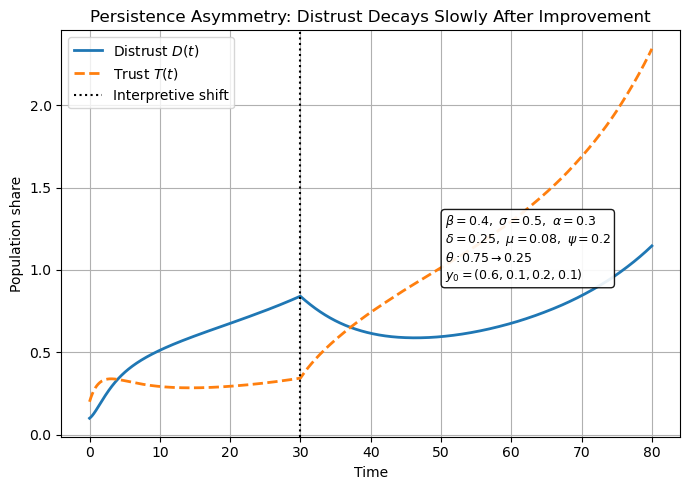

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed structural parameters
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.25     # Trust recovers relatively quickly
mu = 0.08        # Distrust decays slowly (persistence asymmetry)
psi = 0.2

# -----------------------------
# Time settings
# -----------------------------
t_eval = np.linspace(0, 80, 1600)

# -----------------------------
# Phase 1: High-skepticism environment
# -----------------------------
theta_high = 0.75
t_span_1 = (0, 30)
y0 = [0.6, 0.1, 0.2, 0.1]

sol1 = solve_ivp(
    trust_model,
    t_span_1,
    y0,
    args=(beta, sigma, alpha, delta, mu, psi, theta_high),
    t_eval=t_eval[t_eval <= 30]
)

# -----------------------------
# Phase 2: Improved interpretive environment
# -----------------------------
theta_low = 0.25
t_span_2 = (30, 80)

sol2 = solve_ivp(
    trust_model,
    t_span_2,
    sol1.y[:, -1],
    args=(beta, sigma, alpha, delta, mu, psi, theta_low),
    t_eval=t_eval[t_eval > 30]
)

# -----------------------------
# Combine solutions
# -----------------------------
t = np.concatenate([sol1.t, sol2.t])
D = np.concatenate([sol1.y[3], sol2.y[3]])
T = np.concatenate([sol1.y[2], sol2.y[2]])

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(t, D, label="Distrust $D(t)$", linewidth=2)
plt.plot(t, T, linestyle="--", label="Trust $T(t)$", linewidth=2)

plt.axvline(30, linestyle=":", color="black", label="Interpretive shift")


param_text = (
    r"$\beta=0.4,\ \sigma=0.5,\ \alpha=0.3$" "\n"
    r"$\delta=0.25,\ \mu=0.08,\ \psi=0.2$" "\n"
    r"$\theta: 0.75 \rightarrow 0.25$" "\n"
    r"$y_0=(0.6,0.1,0.2,0.1)$"
)

plt.gca().text(
    0.62, 0.55, param_text,
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)


plt.xlabel("Time")
plt.ylabel("Population share")
plt.title("Persistence Asymmetry: Distrust Decays Slowly After Improvement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


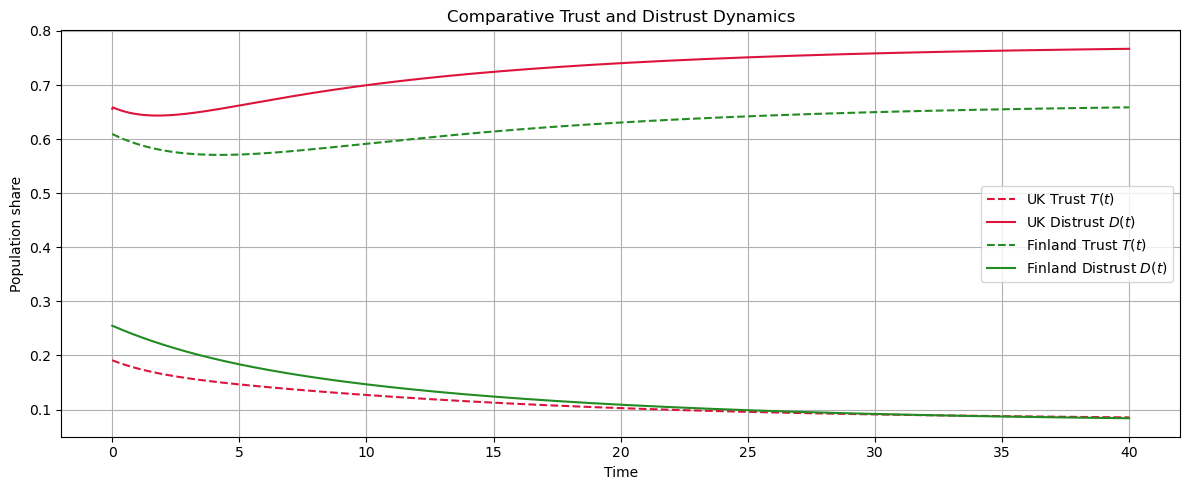

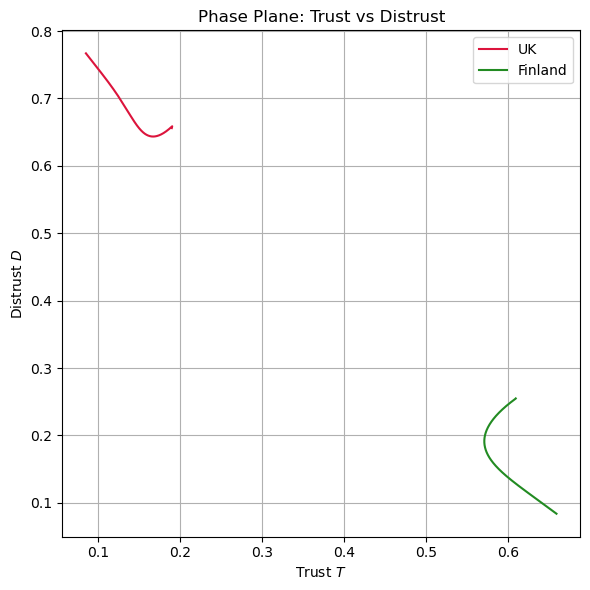

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PARAMETER SETS (illustrative, OECD-consistent)
# ============================================================

PARAMS = {
    "UK": {
        'beta': 0.30,
        'sigma': 0.40,
        'theta': 0.75,
        'alpha': 0.02,
        'delta': 0.10,
        'mu': 0.02,
        'psi': 0.15
    },
    "Finland": {
        'beta': 0.20,
        'sigma': 0.30,
        'theta': 0.20,
        'alpha': 0.10,
        'delta': 0.06,
        'mu': 0.08,
        'psi': 0.01
    }
}

# ============================================================
# MODEL RHS
# ============================================================

def trust_rhs(t, y, p):
    S, E, T, D = y

    dS = -(p['beta'] + p['alpha']) * S + p['delta'] * T + p['mu'] * D
    dE = p['beta'] * S + p['psi'] * D * S - p['sigma'] * E
    dT = (1 - p['theta']) * p['sigma'] * E + p['alpha'] * S - p['delta'] * T
    dD = p['theta'] * p['sigma'] * E - p['mu'] * D

    return np.array([dS, dE, dT, dD])

# ============================================================
# RUNGE–KUTTA 4 INTEGRATOR
# ============================================================

def rk4(f, y0, t0, t_end, n_steps, params):
    h = (t_end - t0) / n_steps
    t = np.linspace(t0, t_end, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0

    for i in range(n_steps):
        k1 = f(t[i], y[i], params)
        k2 = f(t[i] + h/2, y[i] + h/2 * k1, params)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2, params)
        k4 = f(t[i] + h, y[i] + h * k3, params)

        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

        # numerical renormalization (optional but clean)
        y[i+1] /= y[i+1].sum()

    return t, y

# ============================================================
# INITIAL CONDITIONS (OECD-inspired proportions)
# ============================================================

INITIALS = {
    "UK":      np.array([0.1441, 0.0050, 0.1901, 0.6560]),
    "Finland": np.array([0.1349, 0.0006, 0.6091, 0.2549])
}

# ============================================================
# SOLVE SYSTEMS
# ============================================================

t0, Tmax, N = 0, 40, 2000
solutions = {}

for country in PARAMS:
    t, y = rk4(trust_rhs, INITIALS[country], t0, Tmax, N, PARAMS[country])
    solutions[country] = (t, y)

# ============================================================
# PLOT 1: TRUST & DISTRUST DYNAMICS
# ============================================================

plt.figure(figsize=(12,5))

for country, color in zip(["UK", "Finland"], ["crimson", "forestgreen"]):
    t, y = solutions[country]
    plt.plot(t, y[:,2], color=color, linestyle='--', label=f"{country} Trust $T(t)$")
    plt.plot(t, y[:,3], color=color, label=f"{country} Distrust $D(t)$")

plt.xlabel("Time")
plt.ylabel("Population share")
plt.title("Comparative Trust and Distrust Dynamics")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# PLOT 2: PHASE PLANE (T vs D)
# ============================================================

plt.figure(figsize=(6,6))

for country, color in zip(["UK", "Finland"], ["crimson", "forestgreen"]):
    _, y = solutions[country]
    plt.plot(y[:,2], y[:,3], color=color, label=country)

plt.xlabel("Trust $T$")
plt.ylabel("Distrust $D$")
plt.title("Phase Plane: Trust vs Distrust")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


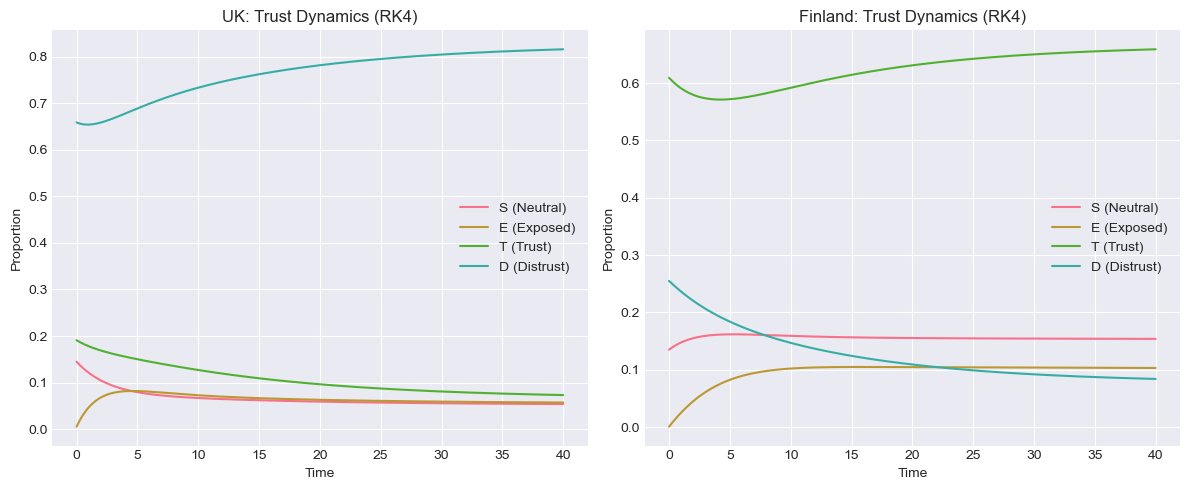

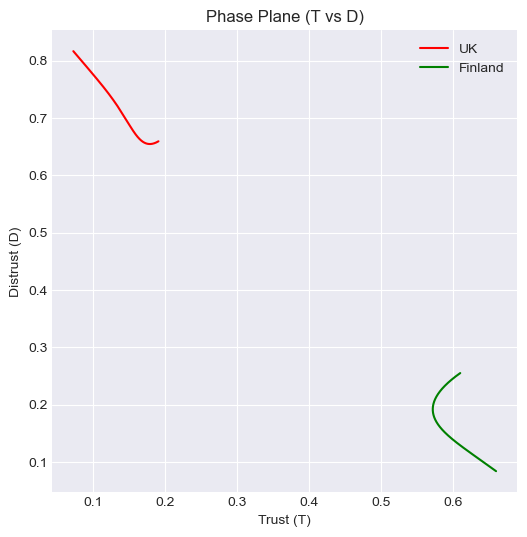

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PARAMETERS (fixed, illustrative)
# ============================================================

# UK: unstable / polarized
params_UK = {
    'beta': 0.30,
    'sigma': 0.40,
    'theta': 0.75,
    'alpha': 0.02,
    'delta': 0.10,
    'mu': 0.02,
    'psi': 0.15
}

# Finland: stable / high-trust
params_FIN = {
    'beta': 0.20,
    'sigma': 0.30,
    'theta': 0.20,
    'alpha': 0.10,
    'delta': 0.06,
    'mu': 0.08,
    'psi': 0.01
}

# ============================================================
# MODEL RHS (corrected, mass-conserving)
# ============================================================

def f(t, S, E, T, D, p):
    dS = -(p['beta'] + p['alpha']) * S \
         + p['delta'] * T \
         + p['mu'] * D \
         - p['psi'] * D * S          # <-- FIXED

    dE = p['beta'] * S \
         + p['psi'] * D * S \
         - p['sigma'] * E

    dT = (1 - p['theta']) * p['sigma'] * E \
         + p['alpha'] * S \
         - p['delta'] * T

    dD = p['theta'] * p['sigma'] * E \
         - p['mu'] * D

    return np.array([dS, dE, dT, dD])

# ============================================================
# RUNGE–KUTTA 4 METHOD
# ============================================================

def rk4_system(f, y0, t0, T, N, params):
    h = (T - t0) / N
    t = np.linspace(t0, T, N + 1)
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0

    for n in range(N):
        k1 = f(t[n], *y[n], params)
        k2 = f(t[n] + h/2, *(y[n] + h/2 * k1), params)
        k3 = f(t[n] + h/2, *(y[n] + h/2 * k2), params)
        k4 = f(t[n] + h, *(y[n] + h * k3), params)

        y[n + 1] = y[n] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y

# ============================================================
# INITIAL CONDITIONS (normalized)
# ============================================================

y0_UK = np.array([0.1441, 0.0050, 0.1901, 0.6560])
y0_FIN = np.array([0.1349, 0.0006, 0.6091, 0.2549])

y0_UK = y0_UK / np.sum(y0_UK)
y0_FIN = y0_FIN / np.sum(y0_FIN)

# ============================================================
# SOLVE IVPs
# ============================================================

t0 = 0
Tmax = 40
N = 2000

t_UK, y_UK = rk4_system(f, y0_UK, t0, Tmax, N, params_UK)
t_FIN, y_FIN = rk4_system(f, y0_FIN, t0, Tmax, N, params_FIN)

# ============================================================
# PLOTS: TIME SERIES
# ============================================================

labels = ['S (Neutral)', 'E (Exposed)', 'T (Trust)', 'D (Distrust)']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for i in range(4):
    plt.plot(t_UK, y_UK[:, i], label=labels[i])
plt.title("UK: Trust Dynamics (RK4)")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.legend()

plt.subplot(1,2,2)
for i in range(4):
    plt.plot(t_FIN, y_FIN[:, i], label=labels[i])
plt.title("Finland: Trust Dynamics (RK4)")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.legend()

plt.tight_layout()
plt.show()

# ============================================================
# PHASE PLANE: T vs D
# ============================================================

plt.figure(figsize=(6,6))
plt.plot(y_UK[:, 2], y_UK[:, 3], 'r', label='UK')
plt.plot(y_FIN[:, 2], y_FIN[:, 3], 'g', label='Finland')
plt.xlabel("Trust (T)")
plt.ylabel("Distrust (D)")
plt.title("Phase Plane (T vs D)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
def param_text(p):
    return (
        r"$\beta={:.2f}$".format(p['beta']) + "\n" +
        r"$\sigma={:.2f}$".format(p['sigma']) + "\n" +
        r"$\theta={:.2f}$".format(p['theta']) + "\n" +
        r"$\alpha={:.2f}$".format(p['alpha']) + "\n" +
        r"$\delta={:.2f}$".format(p['delta']) + "\n" +
        r"$\mu={:.2f}$".format(p['mu']) + "\n" +
        r"$\psi={:.2f}$".format(p['psi'])
    )


In [14]:
def plot_time_series(t, y, params, title):
    labels = ['S (Neutral)', 'E (Exposed)', 'T (Trust)', 'D (Distrust)']

    plt.figure(figsize=(8,5))
    for i in range(4):
        plt.plot(t, y[:, i], linewidth=2, label=labels[i])

    plt.xlabel("Time")
    plt.ylabel("Population share")
    plt.title(title)
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)

    # Parameter box
    plt.text(
        1.02, 0.5,
        param_text(params),
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='center',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
    )

    plt.tight_layout()
    plt.show()


In [15]:
def plot_phase_TD(y, params, title):
    plt.figure(figsize=(6,6))
    plt.plot(y[:,2], y[:,3], linewidth=2)

    plt.xlabel("Trust $T$")
    plt.ylabel("Distrust $D$")
    plt.title(title)
    plt.grid(True, alpha=0.3)

    plt.text(
        1.05, 0.5,
        param_text(params),
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='center',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
    )

    plt.tight_layout()
    plt.show()


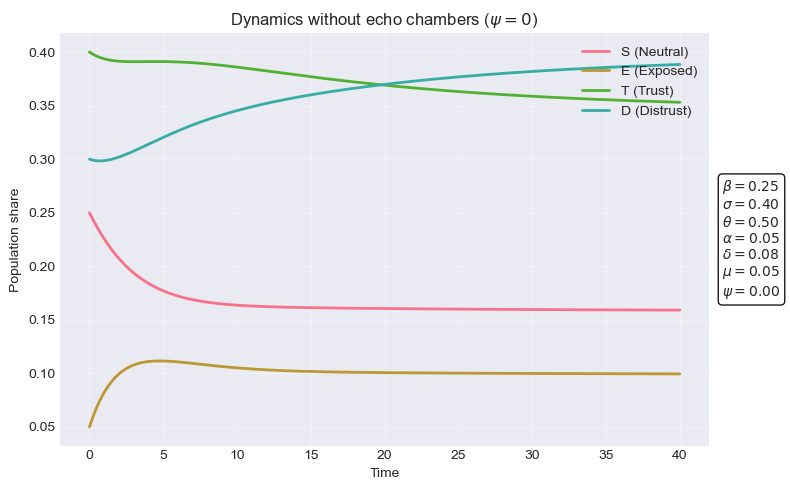

In [23]:
params_no_psi = params_base.copy()
params_no_psi['psi'] = 0.0

t, y = simulate_case(params_no_psi, y0)

plot_time_series(
    t, y, params_no_psi,
    title="Dynamics without echo chambers ($\\psi = 0$)"
)


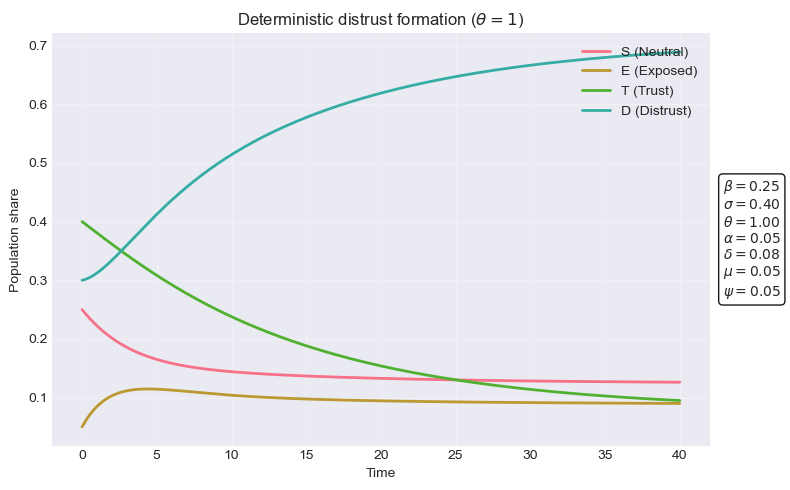

In [19]:
params_theta1 = params_base.copy()
params_theta1['theta'] = 1.0

t, y = simulate_case(params_theta1, y0)

plot_time_series(
    t, y, params_theta1,
    title="Deterministic distrust formation ($\\theta = 1$)"
)



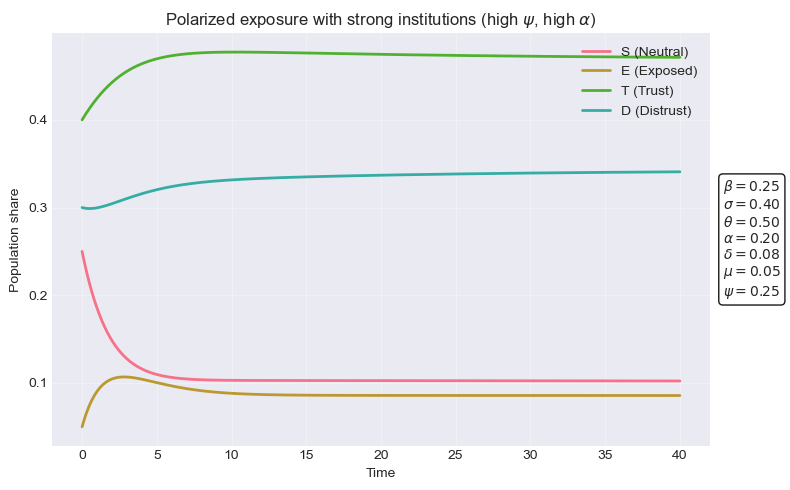

In [21]:
params_high = params_base.copy()
params_high['psi'] = 0.25
params_high['alpha'] = 0.20

t, y = simulate_case(params_high, y0)

plot_time_series(
    t, y, params_high,
    title="Polarized exposure with strong institutions (high $\\psi$, high $\\alpha$)"
)


